# Introduction to data analytics with pandas

### Quentin Caudron
#### PyData Seattle, July 2017
__[Youtube: presentation at PyData Seatle 2017](https://www.youtube.com/watch?v=F7sCL61Zqss)__


### Referenced material

#### Github Machine Learning material
__[College2: coffee_analysis](https://github.com/flashypepo/machine_learning/tree/master/college%202%20-%20Introduction%20Data%20Science%20stack%202)__


#### Original material
**2018-1118 PP** beware, some plot-calls are not working with pandas 0.23.4

Slides are available at https://github.com/QCaudron/pydata_pandas. One notebook contains solutions; **beware of spoilers**.

The notebooks contain **notes** about what we're doing that I'll skip during this workshop, but try to explain on the way.

### Get exercise notebook and datasets

1. download `College 2`-folder from __[Github Machine Learning](https://github.com/flashypepo/machine_learning/tree/master/college%202%20-%20Introduction%20Data%20Science%20stack%202)__
2. Open Notebook `coffee_analysis_exercise.ipynb` in your webbrowser from the Jupyter notebook folder.
> - open `JupyterLab` or `Jupyter Notebook` from the Anaconda Navigator panel,
> - Terminal/MSDOS prompt, type in: `jupyter notebook`



![Jupyter coffee_analysis_exercise](images/exercise_pandas.png)

...

## Systems check

Do you have a working Python installation, with the `pandas` package ?

In [30]:
import pandas as pd

In [130]:
# print the value of pandas, `pd.__version__`,
# to see what version of `pandas` you have installed.
pd.__version__

'0.23.4'

## A little about the hero of this story

<center><img src="images/coffee_machine.jpg" width="400px" /></center>

## A little about this workshop
We'll be analysing a real-world dataset together. It's about a favourite thing in the world : **coffee**. This dataset was collected at the Mathematics Institute at the University of Warwick. It's a time-series dataset, describing the **total number of coffees made by our espresso machine** by a certain date.

We'll be running through an analysis of this dataset as a way to expose you to the `pandas` API. The aim is to develop a little familiarity with how to work with `pandas`.

The `pandas` API is **enormous**. The [documentation](http://pandas.pydata.org/pandas-docs/stable/) is excellent, don't hesitate to look things up.<br>
**2018_11 PP** - do not forget to look for answers on __[StackOverflow](https://stackoverflow.com)__.

## Key questions

The dataset : **total number of coffees made vs time**.

1. Who are the main contributors to this dataset, and when are contributions generally made ?
2. What are the department's weekday coffee habits ?
3. How much coffee are people drinking ?

## Let's begin

In [2]:
# import libraries numpy, pandas, matplotlib and seaborn
# tell matplotlib to plot directly in notebook

import numpy as np
import pandas as pd

# some imports to set up plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

%matplotlib inline

**Note :** The last line here tells `matplotlib` to plot directly under the cell where any plotting code is called. `pandas` uses `matplotlib` to generate graphs, and without this, the graphs would appear outside the Jupyter notebook when you called `plt.show()` - but we just want them to appear without having to do this.

http://ipython.readthedocs.io/en/stable/interactive/plotting.html#id1

## Importing the data

Let's import the coffee data from CSV.

In [3]:
# Read data from data/coffees.csv
data = pd.read_csv("datasets/coffees.csv")

**Note :** `pandas` can read from many data formats : CSV, JSON, Excel, HDF5, SQL, and more.

http://pandas.pydata.org/pandas-docs/version/0.20/io.html

#### What does this data look like ?

In [4]:
data

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony
7,2011-10-06 10:04:00,513.0,Quentin
8,2011-10-06 12:14:00,539.0,Mike
9,2011-10-06 12:49:00,540.0,Quentin


#### Let's just look at the first few rows.

In [5]:
# .head()
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


We have an index, and three columns : `timestamp`, `coffees`, and `contributor`.

Uh-oh. Why is there a string of text, `testing`, in our coffee numbers ? What's going on in the `coffees` column in the row after that ?

**Note :** `df.head(n=10)` would show the first ten rows. The default is `n=5`.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

#### Let's look at that string in the third row.

In [8]:
# .loc or .iloc
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

Definitely a string. We'll note this as something to fix after we finish looking around.

**Note :** `.loc` uses a label-based lookup, which means that the value you pass into the square brackets must be in the index. Another method, `.iloc`, is integer-location-based, so `.iloc[2]` would return the third row. In this case, they're the same, but had we changed our index, as we'll see later, things would work differently.

Indexing a dataframe with `[]` directly returns a `pd.Series` or `pd.DataFrame` by searching over *columns*, not rows. Indexing a `pd.Series` with `[]` is like indexing a dataframe with `.iloc`.

https://pandas.pydata.org/pandas-docs/stable/indexing.html

#### We should also take a look at that NaN. In fact, let's look at the first five values in `coffees`.

In [9]:
# [] indexing on a series
data.coffees[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

**Note :** here, we're indexing a *series* ( a `pd.Series` object ). From a `pd.DataFrame` ( here, `data` ), when you access a single column ( `data.coffees` or `data["coffees"]` ), the object returned is a `pd.Series`. From that, indexing directly with `[]` works in an integer-location-based manner, and like with numpy arrays, you can take slices ( `[:5]` ).

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

#### How long is the dataset ?

In [10]:
print("Dataset length :")

# len()
print(len(data))

Dataset length :
671


#### What else can we find out ?

In [11]:
# .describe()
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-05-15 09:07:00,13523.0,Quentin
freq,1,2,367


Looks like we also have some missing data - we have 671 rows, but the `coffees` column only has 658 entries.

**Note :** `.describe()` returns different things based on what's in the dataframe, as we'll see later. For numerical columns, it will return things like the mean, standard deviation, and percentiles. For object columns ( strings or datetimes ), it will return the most frequent entry and the first and last items. For all columns, `.describe()` will return the count of objects in that column ( not counting NaNs ) and the unique number of entries. You can determine what's returned using `.describe()`'s keyword arguments.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

#### Let's look at the dataframe where `coffees` is null.

In [70]:
# .isnull() and boolean indexing with []
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


**Note :** `.isnull()` returns a boolean array ( an array of `True`s and `False`s ), that you can then use to index the dataframe directly. Here, our boolean array tells us which entries in the `coffees` column are null, and we use that to index against the full dataframe - so we get back every column in the dataframe, but only those rows where `coffees` is null.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html

#### What type of Python objects are the columns ?

In [12]:
# .dtypes
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

The `contributor` column makes sense as `object`, because we expect strings there; but surely the `timestamp` should be a timestamp-type, and `coffees` should be numerical ?

#### Let's inspect what's in the `timestamp` column.

In [13]:
# print the first element of the series with [] indexing
print(data.timestamp[0])

# print its type()
print(type(data.timestamp[0]))

2011-10-03 08:22:00
<class 'str'>


It looks like the `timestamp` field was read from CSV as a string. That makes sense - CSV files are very basic. We'll have `pandas` interpret these strings as datetimes for us automatically.

**Note :** here's an example of using direct `[]` indexing on a `pd.Series`. We're accessing the first entry, just to see what type of object we have there.

#### On our first pass, what problems did we find ?

- The `timestamp` column contains strings; these need to be datetimes
- The `coffees` column contains some null values and at least one string

## Cleaning the data

#### The `coffees` column should only contain numerical data.

In [14]:
# cast the coffees column using pd.to_numeric, and coerce errors
data.coffees = pd.to_numeric(data.coffees, errors="coerce")

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


 #### The `coffees` column contains NaNs.

In [15]:
# Use .dropna() using a subset, and pass inplace
data.dropna(subset=["coffees"], inplace=True)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


#### The `coffees` column is of type `float`.

In [18]:
# Cast to int using .astype()
data.coffees = data.coffees.astype(int)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


#### Let's have pandas parse the `timestamp` strings to datetime objects. 

In [19]:
# pd.to_datetime()
data.timestamp = pd.to_datetime(data.timestamp)

# Confirm dtypes
data.dtypes

timestamp      datetime64[ns]
coffees                 int64
contributor            object
dtype: object

#### So where do we stand ?

In [20]:
# .describe(), passing the include kwarg to see all information
data.describe(include="all")

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [21]:
# What do the first few rows look like ?
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


**Note :** `.describe(include="all")` is describing all attributes of all columns, but some don't make sense based on the column's `dtype`. For example, the contributor column has no `first` and `last` attributes, because those describe the first and last entries in an ordered series. That makes sense for the timestamp - those have an intuitive definition of sorting - but not so much for strings ( alphabetical order doesn't really matter when they're arbitrary strings ). Similary, the timestamp column has no mean or other numerical traits. What does it mean to calculate the mean timestamp ?

## The time-series at a glance

#### Let's begin by visualising the coffee counts.

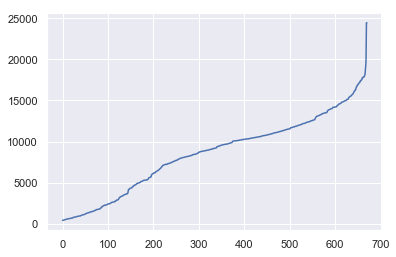

In [22]:
# .plot() on the coffees series
data.coffees.plot()

`pandas` is plotting the coffees against the index, which is just a series of integers.

**Note :** `.plot()` on a `pd.Series` will plot the data against the index. On a `pd.DataFrame`, the `.plot()` method allows plotting of one column against another.

By default, `.plot()` renders a line graph, but you can specify which type of plot you'd like - bar, line, histogram, area, scatter, etc..

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

#### Let's use the dataframe's `plot()` method rather than that of the series.

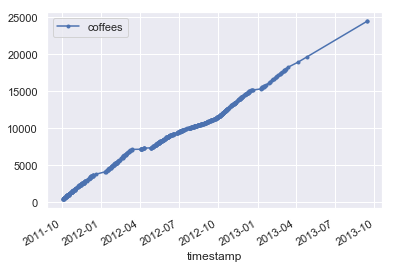

In [23]:
# .plot() on the dataframe, setting x to the timestamp, with dot-dash style

#2018-1118 DEPRECATED: data.plot(x=data.timestamp, style=".-") #2018-1113 deprecated
data.plot(x='timestamp', y='coffees', style='.-')
#same: data.plot.line(x='timestamp', y='coffees', style='.-')

We have some very uneven spacing in places. We might start by cutting off the last few points of this time-series, which is missing a lot of data.

#### We'll inspect the last few points of this time-series.

In [24]:
# .tail() with ten rows
data.tail(n=10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


After mid-March, things start getting spaced rather erratically.

#### Let's cut off the tail of the time-series, anything after 2013-03-01.

In [25]:
# Use conditional indexing against the timestamp
data = data[data.timestamp < "2013-03-01"]

data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


**Note :** this is another example of boolean indexing. `data.timestamp < "2013-03-01"` is a boolean array, and can be passed into the dataframe immediately in `[]`, much like with a `np.ndarray`.

#### One final look.

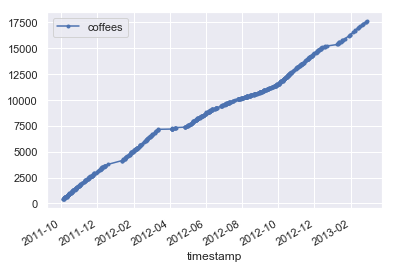

In [26]:
# Once again, plot the data against the timestamp
#2018-118 DEPRECATED: data.plot(x=data.timestamp, style=".-")
data.plot(x='timestamp', y='coffees', style='.-')

## 1. Contributions to the time-series

#### Who are our main contributors ?

In [27]:
# .value_counts()
data.contributor.value_counts()

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

**Note :** `.value_counts()` counts the unique values in a series. It's similar to doing a `.groupby()` followed by a `.count()`, as we'll see soon.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

#### Let's plot this.

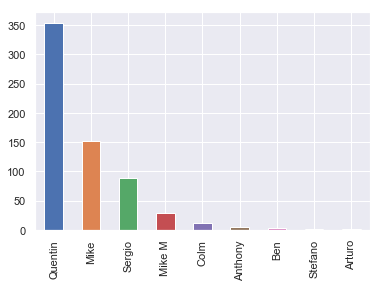

In [28]:
# .plot() a bar chart from the value counts
data.contributor.value_counts().plot(kind="bar")

#### On which weekdays were contributions made ?

In [29]:
# Create a series of the weekdays for each entry using .dt.weekday
weekdays = data.timestamp.dt.weekday

# assign() it to our dataframe
data = data.assign(weekdays=weekdays)

data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


#### Can we replace these integers with actual weekdays ?

In [30]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}

# Use .apply() to apply a custom function to the weekdays column
data.weekdays = data.weekdays.apply(lambda x: weekday_dict[x])

data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


#### Let's group by these weekdays.

In [31]:
# .groupby() the weekdays and then .count() rows in each group
weekday_counts = data.groupby("weekdays").count()

# We can reorder this dataframe by our weekday_names list
weekday_counts = weekday_counts.loc[weekday_names]

weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


**Note :** this first line could be replaced by `weekday_counts = data.weekdays.value_counts()`, with the only difference being that that would return a series to us, and here, we got back a dataframe.

#### We can now visualise these weekday counts.

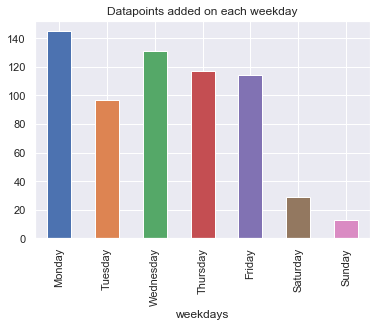

In [32]:
# .plot() a bar chart of data in weekday_counts
weekday_counts.timestamp.plot(kind="bar", title="Datapoints added on each weekday")

## 2. Weekday trends

#### First, we'll set our timestamps to the dataframe's index

In [33]:
# Set the dataframe's .index property
data.index = data.timestamp

# Let's drop the timestamp column, as we no longer need it
data.drop(["timestamp"], axis=1, inplace=True)

data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


#### Let's add some rows at midnight on every day.

In [34]:
# pd.date_range, with daily frequency, and normalisation
midnights = pd.date_range(data.index[0], data.index[-1], freq="D", normalize=True)

midnights

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

**Note :** `pd.date_range` creates a fixed-frequency DatetimeIndex. `normalize=True` ensures these datetimes are at midnight, and not at whatever time the starting point is.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

#### Let's take the union of this index and our dataset's index.

In [35]:
# Take the union of the existing and new indices
new_index = midnights.union(data.index)

new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

**Note :** the union of these indices is just a new index where entries from both indices are present. It's sorted by time.

#### Now we can reindex our dataframe with this new index.

In [36]:
# .reindex() the dataframe
upsampled_data = data.reindex(new_index)

upsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


**Note :** `.reindex()` keeps any values that conform to the new index, and inserts `NaN`s where we have no values.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

#### We can fill in these `NaN`s using interpolation.

In [37]:
# .interpolate the upsampled_data using the time method
upsampled_data = upsampled_data.interpolate(method="time")

upsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thursday
2011-10-06 10:04:00,513.000000,Quentin,Thursday


#### We're now ready to resample the time-series at a daily frequency.

In [38]:
# .resample() followed by .asfreq()
daily_data = upsampled_data.resample("D").asfreq()

# Drop the contributor column, we no longer need it
daily_data = daily_data.drop(["contributor"], axis=1)

# Generate a column of weekday names
daily_data["weekdays"] = daily_data.index.weekday_name  # We did it the slow way before...
daily_data.head()

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday


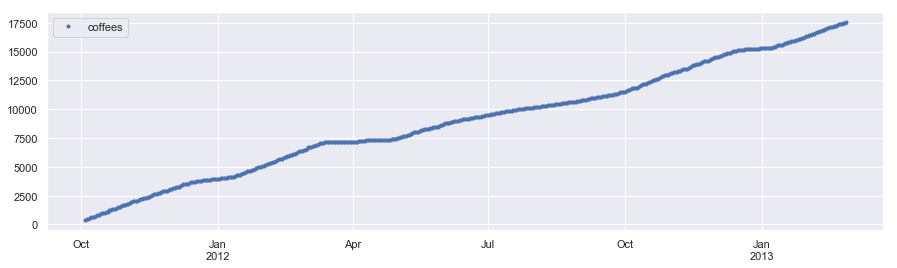

In [39]:
# Let's plot the data once more, to see how we're doing
daily_data.plot(figsize=(15, 4), style=".")

#### Let's begin by figuring out how many coffees are made on any given day.

In [40]:
# Use .diff() on the coffees column; follow up with .shift()
coffees_made = daily_data.coffees.diff().shift(-1)

# Add this as a column to the dataframe
daily_data["coffees_made_today"] = coffees_made

daily_data.head()

,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941


**Note :** we use `.shift()` here because if we look at the `.diff()` between a Monday and a Tuesday, those coffees are attributed to the Tuesday. However, what we want to say is "this many coffees were made at some point on the Monday", so we shift the entire series up one.

#### Now we can group this by weekday.

In [41]:
# .groupby weekdays, take the mean, and grab the coffees_made_today column
coffees_by_day = daily_data.groupby("weekdays").mean().coffees_made_today

coffees_by_day

weekdays
Friday       34.138034
Monday       37.802404
Saturday     16.299858
Sunday       15.768215
Thursday     43.500824
Tuesday      39.132964
Wednesday    47.640057
Name: coffees_made_today, dtype: float64

#### Let's order this series and then plot it.

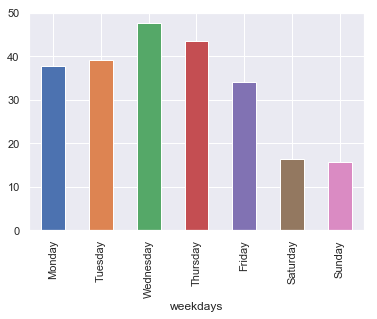

In [42]:
# Sort coffees_by_day by our list of weekday names
coffees_by_day = coffees_by_day[weekday_names]

# Plot a bar chart
coffees_by_day.plot(kind="bar")

Wednesdays was seminar day...

## 3. Coffee per person

#### We can now pull in data on how many people were in the department.

In [44]:
# Bring in department_members.csv;
# have the first column be the index, and parse the dates
people = pd.read_csv("datasets/department_members.csv", index_col=[0], parse_dates=True)

people.head()

,members
date,
2011-08-31,12
2011-09-30,14
2011-10-31,14
2011-11-30,14
2011-12-31,15


#### Let's join the datasets.

In [45]:
# Use an outer join, then interpolate over missing values using nearest values
daily_data = daily_data.join(people, how="outer").interpolate(method="nearest")

daily_data.head()

,coffees,weekdays,coffees_made_today,members
2011-08-31,NaN,NaN,NaN,12.0
2011-09-30,NaN,NaN,NaN,14.0
2011-10-03,NaN,Monday,NaN,14.0
2011-10-04,404.408262,Tuesday,34.255987,14.0
2011-10-05,438.664249,Wednesday,55.402049,14.0


**Note :** by default, inner joins are performed. That is, if a row from one of the datasets has an index that isn't in the other dataset, that row is dropped. You can specify whether you want outer, left, or right joins, as well plenty of other useful options. The `pandas` API for joining or merging datasets is very developed.

https://pandas.pydata.org/pandas-docs/stable/merging.html

#### Let's create a column for the number of coffees consumed per person.

In [46]:
# New column is the ratio of coffees made on a given day to number of members in the department
daily_data["coffees_per_person"] = daily_data.coffees_made_today / daily_data.members

# Let's drop those remaining NaNs while we're at it
daily_data.dropna(inplace=True)

daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157


#### We can now plot this column.

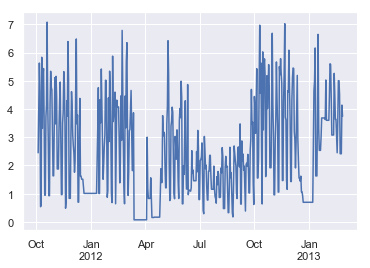

In [47]:
# Plot the coffees_per_person column
daily_data.coffees_per_person.plot()

#### Those are strange plateaus. We'll pull in another dataset, telling us when the machine was broken.

In [48]:
# pd.read_csv(); try using coffee_status.csv
# parse_dates as kwarg; also pass index_col
machine_status = pd.read_csv("datasets/coffee_status.csv", parse_dates=["date"], index_col="date")

machine_status.head()

,status
date,
2011-09-16,OK
2011-09-17,OK
2011-09-18,OK
2011-09-19,OK
2011-09-20,OK


**Note :** the `parse_dates` keyword argument takes several values. By passing in a list of strings, we're telling `pandas` to attempt to parse the dates in columns with those names.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

#### What values are in the `status` column ?

In [49]:
# .value_counts()
machine_status.status.value_counts()

OK        514
BROKEN     88
Name: status, dtype: int64

#### A quick trick to plot this as a time-series...

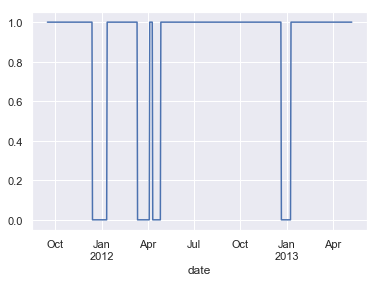

In [50]:
# Make a pd.Series from the status series where things are OK
# 2018-1118 PP updated based upon StackOverflow:https://stackoverflow.com/questions/51733677/pandas-boolean-series-wont-plot
#numerical_status.plot() # TypeError: Empty 'DataFrame': no numeric data to plot

numerical_status = machine_status.status == "OK"

numerical_status.astype(float).plot()

**Note :** the first line here creates a boolean `pd.Series`, holding the value `True` when `machine_status.status` is `"OK"`, and `False` otherwise. Because it's a `pd.Series`, its index stays the same as that of `machine_status`, which was a `DatetimeIndex`. Then, we can plot the boolean series ( `True` appearing as `1`, and `False` appearing as `0` ), and just quickly scan to see that there are long areas where the coffee machine was operations, with short bouts ( thankfully ! ) of the machine being broken.

#### Let's join the datasets on the date field !

In [51]:
# .join()
daily_data = daily_data.join(machine_status)

daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001,OK
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496,OK
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157,OK


#### We'll bring in this numerical representation of status column into our dataframe too.

In [52]:
# Column depicting when the status was "OK"
# Cast the series to ints before as you create a new column in the dataframe
daily_data["numerical_status"] = (daily_data.status == "OK").astype(int)

daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status,numerical_status
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK,1
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK,1
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001,OK,1
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496,OK,1
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157,OK,1


#### Let's plot both the coffees per person and the numerical status.

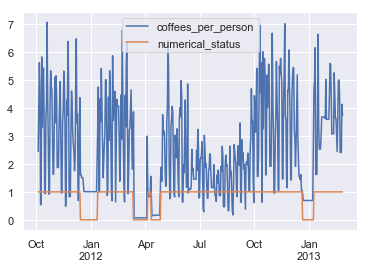

In [53]:
# Plot both columns on the same graph, using default args
daily_data[["coffees_per_person", "numerical_status"]].plot()

#### We see a strong weekday-weekend effect. Resampling weekly will fix that.

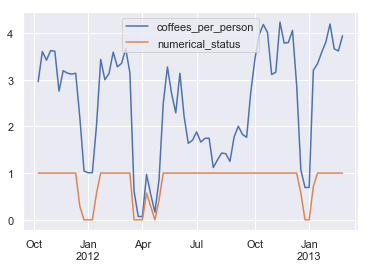

In [54]:
# Resample weekly, taking the mean of each week to get a weekly value
weekly_data = daily_data.resample("W").mean()

weekly_data[["coffees_per_person", "numerical_status"]].plot()

## What have we achieved ?

#### Cleaning

- Cast columns to the correct dtypes
- Dropped rows with no data
- Truncated the time-series when things got sparse

#### Exploring the contributions

- Discovered who contributed to the dataset and how much
- Established how contributions varied by day of the week

#### Exploring the time-series

- Resampled the uneven time-series to regular daily intervals
- Interpolated over missing data using our time index
- Discovered on what days of the week coffee was especially popular
- Joined the dataset with others to enrich the information available
- Derived new columns from existing ones
- Smoothed the time-series by weekly downsampling

#### Insights

- A small number of people contributed most of the data
- Contributions were lacking at the weekends, and Mondays had the most contributions
- Seminar Wednesdays is a strong driver of coffee consumption
- Periods of low coffee drinking correlated strongly with periods where the machine was broken
- A significant dip in consumption occurred in the summer months